In [1]:
# Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [14]:
# Define Solar Plant Data File
faro_plant = pd.read_csv('SunlabFaro_PV2017.csv')

In [15]:
faro_plant.head()

,Datetime,A_Vertical - Voltage DC [V],A_Vertical - Current DC [A],A_Vertical - Power DC [W],A_Optimal - Voltage DC [V],A_Optimal - Current DC [A],A_Optimal - Power DC [W],A_Horizontal - Voltage DC [V],A_Horizontal - Current DC [A],A_Horizontal - Power DC [W],...,B_Vertical - Power DC [W],B_Optimal - Voltage DC [V],B_Optimal - Current DC [A],B_Optimal - Power DC [W],B_Horizontal - Voltage DC [V],B_Horizontal - Current DC [A],B_Horizontal - Power DC [W],B_Vertical - Temperature [ÂºC],B_Optimal - Temperature [ÂºC],B_Horizontal - Temperature [ÂºC]
0,2017-05-02T07:49:00+00:00,15.05,0.8750,13.168750,29.50,2.4850,73.30750,28.60,1.7475,49.9785,...,15.063125,28.7,2.3875,68.52125,28.60,2.8550,81.653000,19.1,17.3,18.6
1,2017-05-02T07:50:00+00:00,15.05,0.8750,13.168750,29.50,2.5125,74.11875,29.80,1.3525,40.3045,...,15.120000,28.7,2.4200,69.45400,28.30,2.8975,81.999250,19.2,17.5,18.8
2,2017-12-04T15:05:00+00:00,29.85,4.9325,147.235125,29.80,4.9400,147.21200,29.90,2.5300,75.6470,...,153.055500,28.1,5.0675,142.39675,28.95,2.4750,71.651250,28.8,26.1,20.8
3,2017-05-02T08:09:00+00:00,19.40,1.0150,19.691000,29.35,3.0950,90.83825,28.80,3.5575,102.4560,...,17.474375,28.4,3.0325,86.12300,28.65,3.3700,96.550500,20.9,20.3,21.7
4,2017-05-02T08:10:00+00:00,19.40,1.0275,19.933500,29.35,3.1200,91.57200,29.85,3.4100,101.7885,...,17.712000,28.4,3.0625,86.97500,28.35,3.4275,97.169625,20.9,20.5,21.9


In [16]:
faro_plant.tail()

,Datetime,A_Vertical - Voltage DC [V],A_Vertical - Current DC [A],A_Vertical - Power DC [W],A_Optimal - Voltage DC [V],A_Optimal - Current DC [A],A_Optimal - Power DC [W],A_Horizontal - Voltage DC [V],A_Horizontal - Current DC [A],A_Horizontal - Power DC [W],...,B_Vertical - Power DC [W],B_Optimal - Voltage DC [V],B_Optimal - Current DC [A],B_Optimal - Power DC [W],B_Horizontal - Voltage DC [V],B_Horizontal - Current DC [A],B_Horizontal - Power DC [W],B_Vertical - Temperature [ÂºC],B_Optimal - Temperature [ÂºC],B_Horizontal - Temperature [ÂºC]
206954,2017-02-10T09:36:00+00:00,30.00,3.9800,119.40000,28.95,4.5925,132.952875,29.90,2.7275,81.552250,...,124.590750,28.55,4.5375,129.545625,29.70,2.5675,76.25475,29.5,28.7,19.7
206955,2017-07-09T17:01:00+00:00,26.65,0.8250,21.98625,28.25,2.4900,70.342500,27.70,3.4875,96.603750,...,21.173625,27.85,2.4275,67.605875,27.35,3.4300,93.81050,31.5,37.4,36.7
206956,2017-06-24T09:34:00+00:00,27.20,1.6175,43.99600,27.20,4.8425,131.716000,26.60,5.5725,148.228500,...,32.536000,26.70,4.8675,129.962250,26.80,5.3950,144.58600,36.7,39.6,39.0
206957,2017-02-10T09:58:00+00:00,29.65,3.2600,96.65900,29.15,3.9425,114.923875,29.90,2.6500,79.235000,...,99.911625,28.60,3.8975,111.468500,29.40,2.5375,74.60250,28.4,26.9,21.9
206958,2017-07-09T17:10:00+00:00,26.45,0.7900,20.89550,28.05,2.2425,62.902125,27.95,3.2075,89.649625,...,20.244375,27.55,2.1750,59.921250,27.60,3.1625,87.28500,30.9,36.9,36.0


In [17]:
faro_plant.describe()

,A_Vertical - Voltage DC [V],A_Vertical - Current DC [A],A_Vertical - Power DC [W],A_Optimal - Voltage DC [V],A_Optimal - Current DC [A],A_Optimal - Power DC [W],A_Horizontal - Voltage DC [V],A_Horizontal - Current DC [A],A_Horizontal - Power DC [W],A_Vertical - Temperature [ÂºC],...,B_Vertical - Power DC [W],B_Optimal - Voltage DC [V],B_Optimal - Current DC [A],B_Optimal - Power DC [W],B_Horizontal - Voltage DC [V],B_Horizontal - Current DC [A],B_Horizontal - Power DC [W],B_Vertical - Temperature [ÂºC],B_Optimal - Temperature [ÂºC],B_Horizontal - Temperature [ÂºC]
count,200693.000000,200693.000000,200693.000000,202862.000000,202862.000000,202862.000000,202601.000000,202601.000000,202601.000000,206959.000000,...,201762.000000,202646.000000,202646.000000,202646.000000,201652.000000,201652.000000,201652.000000,206959.000000,206959.000000,206959.000000
mean,26.252679,2.170253,61.195009,27.627991,3.577017,100.895601,26.702664,3.310676,91.509276,32.103677,...,61.445563,26.311485,3.654957,99.696385,26.249369,3.254575,88.996677,29.366513,30.600776,28.673176
std,4.549256,1.734714,51.613593,2.637175,2.504926,70.332626,3.881905,2.361044,64.994357,12.805017,...,53.771722,3.560395,2.623921,71.753362,3.789356,2.318152,63.912738,7.901517,9.933495,9.416995
min,10.950000,0.000000,0.000000,10.400000,0.000000,0.000000,10.350000,0.000000,0.000000,3.600000,...,0.000000,11.300000,0.000000,0.000000,10.650000,0.000000,0.000000,3.900000,3.000000,2.100000
25%,26.600000,0.710000,15.938250,27.300000,1.100000,31.316031,26.900000,1.117500,28.616625,24.100000,...,14.937438,26.700000,1.082500,27.027000,26.700000,1.105000,26.711875,23.600000,22.600000,21.300000
50%,28.000000,1.777500,49.362500,28.100000,3.515000,101.261937,27.650000,3.085000,88.797750,31.400000,...,47.638500,27.350000,3.487500,98.210250,27.350000,3.030000,86.030000,30.400000,30.800000,28.700000
75%,29.250000,3.252500,94.449375,29.000000,5.965000,168.920750,28.850000,5.260000,146.233000,37.200000,...,94.946781,28.000000,6.215000,169.296063,28.200000,5.175000,143.009750,35.300000,38.700000,36.200000
max,34.700000,7.985000,244.295250,35.200000,10.237500,301.106000,35.050000,10.237500,302.693500,106.900000,...,250.965000,34.850000,10.237500,310.708125,34.150000,10.237500,296.681875,49.300000,58.500000,54.500000


In [19]:
faro_plant.dtypes

Datetime                             object
A_Vertical - Voltage DC [V]         float64
A_Vertical - Current DC [A]         float64
A_Vertical - Power DC [W]           float64
A_Optimal - Voltage DC [V]          float64
A_Optimal - Current DC [A]          float64
A_Optimal - Power DC [W]            float64
A_Horizontal - Voltage DC [V]       float64
A_Horizontal - Current DC [A]       float64
A_Horizontal - Power DC [W]         float64
A_Vertical - Temperature [ÂºC]      float64
A_Optimal - Temperature [ÂºC]       float64
A_Horizontal - Temperature [ÂºC]    float64
B_Vertical - Voltage DC [V]         float64
B_Vertical - Current DC [A]         float64
B_Vertical - Power DC [W]           float64
B_Optimal - Voltage DC [V]          float64
B_Optimal - Current DC [A]          float64
B_Optimal - Power DC [W]            float64
B_Horizontal - Voltage DC [V]       float64
B_Horizontal - Current DC [A]       float64
B_Horizontal - Power DC [W]         float64
B_Vertical - Temperature [ÂºC]  

In [20]:
faro_plant['Datetime'] = pd.to_datetime(faro_plant['Datetime'])

In [21]:
faro_plant.dtypes

Datetime                            datetime64[ns, UTC]
A_Vertical - Voltage DC [V]                     float64
A_Vertical - Current DC [A]                     float64
A_Vertical - Power DC [W]                       float64
A_Optimal - Voltage DC [V]                      float64
A_Optimal - Current DC [A]                      float64
A_Optimal - Power DC [W]                        float64
A_Horizontal - Voltage DC [V]                   float64
A_Horizontal - Current DC [A]                   float64
A_Horizontal - Power DC [W]                     float64
A_Vertical - Temperature [ÂºC]                  float64
A_Optimal - Temperature [ÂºC]                   float64
A_Horizontal - Temperature [ÂºC]                float64
B_Vertical - Voltage DC [V]                     float64
B_Vertical - Current DC [A]                     float64
B_Vertical - Power DC [W]                       float64
B_Optimal - Voltage DC [V]                      float64
B_Optimal - Current DC [A]                      

In [23]:
faro_plant.describe(include='all')

,Datetime,A_Vertical - Voltage DC [V],A_Vertical - Current DC [A],A_Vertical - Power DC [W],A_Optimal - Voltage DC [V],A_Optimal - Current DC [A],A_Optimal - Power DC [W],A_Horizontal - Voltage DC [V],A_Horizontal - Current DC [A],A_Horizontal - Power DC [W],...,B_Vertical - Power DC [W],B_Optimal - Voltage DC [V],B_Optimal - Current DC [A],B_Optimal - Power DC [W],B_Horizontal - Voltage DC [V],B_Horizontal - Current DC [A],B_Horizontal - Power DC [W],B_Vertical - Temperature [ÂºC],B_Optimal - Temperature [ÂºC],B_Horizontal - Temperature [ÂºC]
count,206959,200693.000000,200693.000000,200693.000000,202862.000000,202862.000000,202862.000000,202601.000000,202601.000000,202601.000000,...,201762.000000,202646.000000,202646.000000,202646.000000,201652.000000,201652.000000,201652.000000,206959.000000,206959.000000,206959.000000
mean,2017-06-19 11:56:17.361989376+00:00,26.252679,2.170253,61.195009,27.627991,3.577017,100.895601,26.702664,3.310676,91.509276,...,61.445563,26.311485,3.654957,99.696385,26.249369,3.254575,88.996677,29.366513,30.600776,28.673176
min,2017-01-20 07:44:00+00:00,10.950000,0.000000,0.000000,10.400000,0.000000,0.000000,10.350000,0.000000,0.000000,...,0.000000,11.300000,0.000000,0.000000,10.650000,0.000000,0.000000,3.900000,3.000000,2.100000
25%,2017-04-06 08:00:30+00:00,26.600000,0.710000,15.938250,27.300000,1.100000,31.316031,26.900000,1.117500,28.616625,...,14.937438,26.700000,1.082500,27.027000,26.700000,1.105000,26.711875,23.600000,22.600000,21.300000
50%,2017-06-07 15:40:00+00:00,28.000000,1.777500,49.362500,28.100000,3.515000,101.261937,27.650000,3.085000,88.797750,...,47.638500,27.350000,3.487500,98.210250,27.350000,3.030000,86.030000,30.400000,30.800000,28.700000
75%,2017-08-16 08:11:30+00:00,29.250000,3.252500,94.449375,29.000000,5.965000,168.920750,28.850000,5.260000,146.233000,...,94.946781,28.000000,6.215000,169.296063,28.200000,5.175000,143.009750,35.300000,38.700000,36.200000
max,2017-12-31 17:18:00+00:00,34.700000,7.985000,244.295250,35.200000,10.237500,301.106000,35.050000,10.237500,302.693500,...,250.965000,34.850000,10.237500,310.708125,34.150000,10.237500,296.681875,49.300000,58.500000,54.500000
std,NaN,4.549256,1.734714,51.613593,2.637175,2.504926,70.332626,3.881905,2.361044,64.994357,...,53.771722,3.560395,2.623921,71.753362,3.789356,2.318152,63.912738,7.901517,9.933495,9.416995


<Axes: >

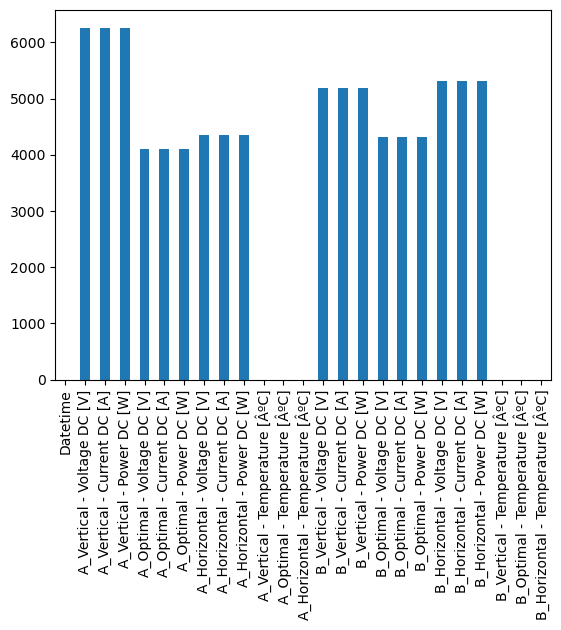

In [24]:
faro_plant.isna().sum().plot.bar()

In [26]:
# Find missing dates on the Solar Plant Data file as we know we're missing about 1/2 the dates compared to Meteo file

# Create full date range for entire 2017 year
full_date_range = pd.date_range(start='2017-01-01', end='2017-12-31', freq='min')

In [31]:
# let's see how many datetimes we're missing
print(f"Number Datetimes from the File: {len(faro_plant['Datetime'])}")
print(f"Number of Datetimes from full range: {len(full_date_range)}")

Number Datetimes from the File: 206959
Number of Datetimes from full range: 524161


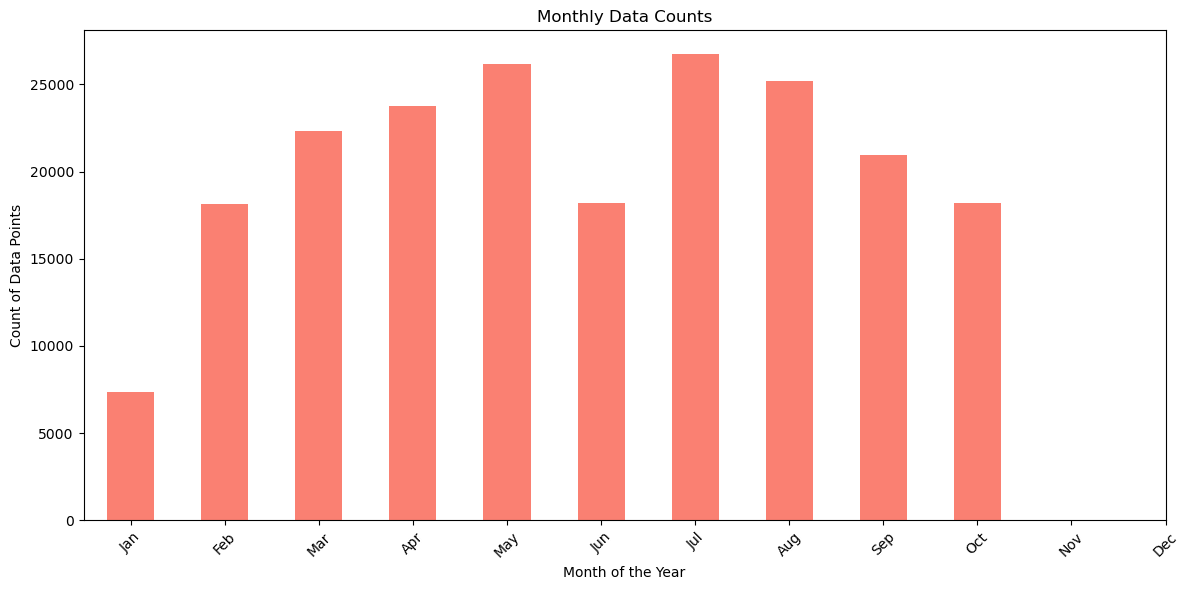

In [34]:
# extract month for plotting
faro_plant['Month'] = faro_plant['Datetime'].dt.month

# group data by month for plotting
monthly_data_count = faro_plant.groupby('Month').size()

# Plot bar chart
plt.figure(figsize=(12,6))
monthly_data_count.plot(kind='bar', color='salmon')
plt.title('Monthly Data Counts')
plt.xlabel('Month of the Year')
plt.ylabel('Count of Data Points')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.tight_layout()
plt.show()